# **机器学习**

In [262]:
import pymongo
import pandas as pd
from pandas import Series
client = pymongo.MongoClient('localhost',27017)
db  = client['Graduation_project']
table = db['jobs_info']
data = pd.DataFrame(list(table.find()))
del data['_id']
del data['signal']

In [263]:
data.shape # 65059 rows × 8 columns

(65059, 8)

In [264]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值----------------
    pattern = re.compile('\d+')
    salary = job_salary
    try:
        res = re.findall(pattern, salary)
        avg_salary = 0
        sum = 0
        for i in res:
            a = int(i)
            sum = sum + a
            avg_salary = sum / 2
    except Exception:
        avg_salary = 0
    # 函数返回值
    return avg_salary

In [265]:
salary_list = []
for i in range(0,65059):
    avg_sal = average(data['职位薪资'][i])
    salary_list.append(avg_sal)

In [266]:
sal = Series(salary_list)

In [267]:
data.insert(8,'salary',sal)

In [268]:
#data

In [269]:
job_data = data[['城市','职位名称','工作经验','公司规模','学历要求','salary']]
job_data.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,经验不限,10000人以上,本科,8.0
1,北京,数据分析师,1-3年,100-499人,本科,27.5
2,北京,数据分析师,3-5年,1000-9999人,本科,20.0
3,北京,数据分析,经验不限,10000人以上,本科,9.0
4,北京,数据分析师,3-5年,10000人以上,本科,12.5


In [270]:
job_data.shape # 65059条数据

(65059, 6)

### 薪资分布

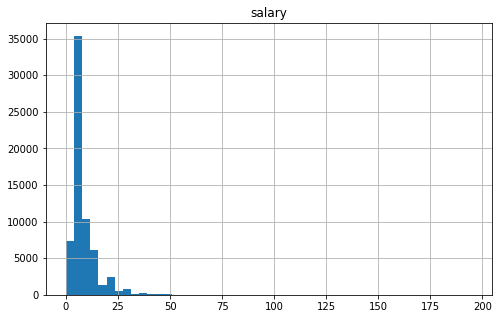

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
job_data.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

# 数据清洗

## 去重

In [272]:
jobs = job_data.drop_duplicates()
jobs.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,经验不限,10000人以上,本科,8.0
1,北京,数据分析师,1-3年,100-499人,本科,27.5
2,北京,数据分析师,3-5年,1000-9999人,本科,20.0
3,北京,数据分析,经验不限,10000人以上,本科,9.0
4,北京,数据分析师,3-5年,10000人以上,本科,12.5


In [273]:
jobs.shape # 61759条数据

(59142, 6)

## 过滤

In [274]:
jobs_copy = jobs.copy()

### 过滤出薪资在6-27k之间

In [275]:
jobs_copy = jobs_copy[jobs_copy['salary']<27]

In [276]:
jobs_copy = jobs_copy[jobs_copy['salary']>6]
jobs_copy.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,经验不限,10000人以上,本科,8.0
2,北京,数据分析师,3-5年,1000-9999人,本科,20.0
3,北京,数据分析,经验不限,10000人以上,本科,9.0
4,北京,数据分析师,3-5年,10000人以上,本科,12.5
8,北京,数据分析师,1-3年,10000人以上,本科,25.5


In [277]:
jobs_copy.shape

(27293, 6)

In [278]:
jobs_copy.describe()

,salary
count,27293.000000
mean,10.915528
std,4.546630
min,6.500000
25%,7.500000
50%,9.000000
75%,12.500000
max,26.500000


### 过滤后的薪资分布图

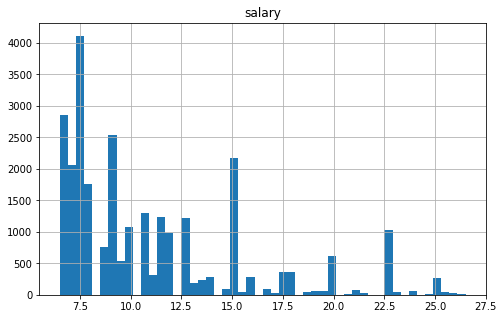

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs_copy.hist(bins=50, figsize=(8,5))
plt.show()

## 不相关职位筛选

### 筛选出职位名称包含：商业|数据分析|挖掘|分析|BI|BA|数据

In [280]:
jobs_copy['职位名称'].value_counts().head()

数据分析师    5114
电商运营     1144
数据分析     1049
产品经理      881
网络推广      609
Name: 职位名称, dtype: int64

In [281]:
da_test = jobs_copy.astype(str)

temp_0 = da_test[
    da_test['职位名称'].str.contains('商业|数据分析|挖掘|分析|BI|BA|数据')
            ]

#data_analysis = jobs_result['职位名称']
temp = list(temp_0['职位名称']) # 将含有关键字的列表表示为test1
jobs_data = da_test[da_test['职位名称'].isin(temp)]

In [282]:
#jobs_data['职位名称'].value_counts()

In [283]:
jobs_data.shape

(13716, 6)

In [284]:
dt_test = jobs_data.astype(str)
y = dt_test[
    dt_test['职位名称'].str.contains('转行')
           ]

test1 = list(y['职位名称']) # 将含有关键字的列表表示为test1
test2 = list(dt_test['职位名称']) # 将全部表示为test2
ret = list(set(test2) ^ set(test1)) # 列表求差集的方法将含有关键字的行除去

jobs_data = dt_test[dt_test['职位名称'].isin(ret)]
jobs_data.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,经验不限,10000人以上,本科,8.0
2,北京,数据分析师,3-5年,1000-9999人,本科,20.0
3,北京,数据分析,经验不限,10000人以上,本科,9.0
4,北京,数据分析师,3-5年,10000人以上,本科,12.5
8,北京,数据分析师,1-3年,10000人以上,本科,25.5


In [285]:
jobs_data_copy = jobs_data.copy()
jobs_data_copy['salary'] = pd.to_numeric(jobs_data_copy['salary'])
jobs_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13665 entries, 0 to 65053
Data columns (total 6 columns):
城市        13665 non-null object
职位名称      13665 non-null object
工作经验      13665 non-null object
公司规模      13665 non-null object
学历要求      13665 non-null object
salary    13665 non-null float64
dtypes: float64(1), object(5)
memory usage: 747.3+ KB


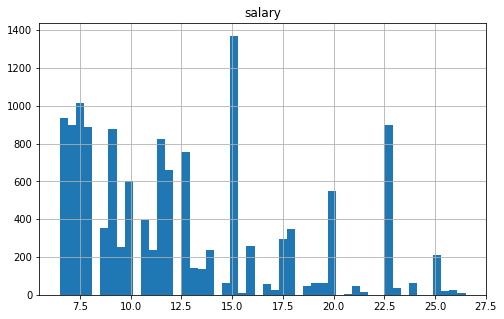

In [286]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs_data_copy.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

## 筛选岗位数量前150的城市

In [287]:
cities = jobs_data_copy['城市'].value_counts()[:150].index

In [288]:
temp_list = []
for item in jobs_data_copy['城市'].values:
    temp_list.append(item in cities)

In [289]:
#temp_list

In [290]:
#temp_list
jobs_data_copy = jobs_data_copy[temp_list]

In [291]:
jobs_data_copy.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,经验不限,10000人以上,本科,8.0
2,北京,数据分析师,3-5年,1000-9999人,本科,20.0
3,北京,数据分析,经验不限,10000人以上,本科,9.0
4,北京,数据分析师,3-5年,10000人以上,本科,12.5
8,北京,数据分析师,1-3年,10000人以上,本科,25.5


In [292]:
#jobs_data_copy['城市'].value_counts()

## 相同属性合并

In [293]:
experience_shift = {
    '1-3年': '1-3年',
    '3-5年': '3-5年',
    '5-10年': '5-10年',
    '应届生':'1年以内',
    '1年以下':'1年以内',
    '1年以内': '1年以内',
    '无经验': '1年以内',
    '经验不限': '经验不限',
    '不限': '经验不限'
}

scale_shift = {
    '100-499人':'100-499人',
    '0-20人':'0-20人',
    '20人以下':'0-20人',
    '20-99人':'20-99人',
    '100-499人':'100-499人',
    '500-999人':'500-999人',
    '1000-9999人':'1000-9999人',
    '10000人以上':'10000人以上',
    '':'100-499人'
}

degree_shift = {
    '中专/中技': '中专',
    '中技': '中专',
    '中专': '中专',
    '高中': '高中',
    '大专': '大专',
    '本科': '本科',
    '硕士': '硕士',
    '博士': '博士',
    '不限': '学历不限',
    '学历不限': '学历不限'
}

In [294]:
jobs_data_copy['工作经验'] = jobs_data_copy['工作经验'].map(experience_shift)
jobs_data_copy['公司规模'] = jobs_data_copy['公司规模'].map(scale_shift)
jobs_data_copy['学历要求'] = jobs_data_copy['学历要求'].map(degree_shift)

In [295]:
jobs_data_copy['工作经验'].value_counts()

1-3年     5219
3-5年     4271
经验不限     1309
5-10年     825
1年以内      825
Name: 工作经验, dtype: int64

In [296]:
jobs_data_copy['公司规模'].value_counts()

100-499人      3843
20-99人        2848
1000-9999人    2503
10000人以上      1648
500-999人      1292
0-20人          315
Name: 公司规模, dtype: int64

In [297]:
jobs_data_copy['学历要求'].value_counts()

本科      8941
大专      2479
硕士       564
学历不限     420
中专        21
博士        13
高中        11
Name: 学历要求, dtype: int64

# 划分训练集与测试集

In [298]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(jobs_data_copy, test_size=0.2, random_state=42)

In [299]:
datas_train = train_set.copy()
datas_test = test_set.copy()

In [300]:
datas_train.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
21110,南阳,数据分析,1-3年,20-99人,本科,6.5
56033,云浮,化妆品数据分析员,1-3年,100-499人,本科,8.5
37705,泉州,数据分析专员,1-3年,100-499人,本科,6.5
24622,淮安,数据分析,1-3年,1000-9999人,大专,6.5
37106,宁德,数据分析师（福州）,1-3年,100-499人,本科,11.5


## 为 标签/类别 属性编码

### 标签/类别 训练集/测试集划分

In [301]:
cata_train = datas_train[['城市','公司规模','学历要求','工作经验']] # 训练集
cata_test = datas_test[['城市','公司规模','学历要求','工作经验']] # 测试集
cata_train.head()

,城市,公司规模,学历要求,工作经验
21110,南阳,20-99人,本科,1-3年
56033,云浮,100-499人,本科,1-3年
37705,泉州,100-499人,本科,1-3年
24622,淮安,1000-9999人,大专,1-3年
37106,宁德,100-499人,本科,1-3年


In [302]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

In [303]:
job_cata_train = cat_encoder.fit_transform(cata_train)
job_cata_test = cat_encoder.fit_transform(cata_test)

In [304]:
cat_encoder.categories_

[array(['三明', '上海', '东沙群岛', '东莞', '东营', '中山', '临沂', '丽水', '乐山', '云浮', '亳州',
        '仙桃', '佛山', '六安', '内江', '凉山', '北京', '十堰', '南京', '南充', '南平', '南通',
        '南阳', '厦门', '台州', '合肥', '周口', '咸宁', '咸阳', '商丘', '商洛', '嘉兴', '大连',
        '天津', '天门', '威海', '娄底', '孝感', '宁德', '安庆', '安康', '安阳', '宜宾', '宜昌',
        '宣城', '宿州', '宿迁', '岳阳', '巴中', '常州', '常德', '平顶山', '广元', '广安', '广州',
        '开封', '张家界', '徐州', '德阳', '怀化', '恩施', '惠州', '成都', '扬州', '揭阳', '攀枝花',
        '新乡', '日照', '杭州', '枣庄', '株洲', '梅州', '武汉', '永州', '汕头', '汕尾', '江门',
        '池州', '河源', '泉州', '泰安', '泰州', '泸州', '洛阳', '济南', '济宁', '淄博', '淮北',
        '淮安', '深圳', '清远', '温州', '湖州', '湘潭', '湘西', '湛江', '滨州', '漯河', '漳州',
        '潍坊', '潜江', '潮州', '烟台', '珠海', '甘孜', '益阳', '盐城', '眉山', '神农架', '福州',
        '绍兴', '绵阳', '聊城', '肇庆', '自贡', '舟山', '芜湖', '苏州', '茂名', '荆州', '荆门',
        '莆田', '莱芜', '菏泽', '衡阳', '衢州', '襄阳', '西安', '资阳', '达州', '连云港', '遂宁',
        '邵阳', '郑州', '郴州', '鄂州', '金华', '铜川', '镇江', '长沙', '阜阳', '阳江', '阿坝',
        '随州', '雅安', '韶关', '黄冈',

### 参数构造函数

In [378]:
cat_encoder.categories_[0] 

array(['三明', '上海', '东沙群岛', '东莞', '东营', '中山', '临沂', '丽水', '乐山', '云浮', '亳州',
       '仙桃', '佛山', '六安', '内江', '凉山', '北京', '十堰', '南京', '南充', '南平', '南通',
       '南阳', '厦门', '台州', '合肥', '周口', '咸宁', '咸阳', '商丘', '商洛', '嘉兴', '大连',
       '天津', '天门', '威海', '娄底', '孝感', '宁德', '安庆', '安康', '安阳', '宜宾', '宜昌',
       '宣城', '宿州', '宿迁', '岳阳', '巴中', '常州', '常德', '平顶山', '广元', '广安', '广州',
       '开封', '张家界', '徐州', '德阳', '怀化', '恩施', '惠州', '成都', '扬州', '揭阳', '攀枝花',
       '新乡', '日照', '杭州', '枣庄', '株洲', '梅州', '武汉', '永州', '汕头', '汕尾', '江门',
       '池州', '河源', '泉州', '泰安', '泰州', '泸州', '洛阳', '济南', '济宁', '淄博', '淮北',
       '淮安', '深圳', '清远', '温州', '湖州', '湘潭', '湘西', '湛江', '滨州', '漯河', '漳州',
       '潍坊', '潜江', '潮州', '烟台', '珠海', '甘孜', '益阳', '盐城', '眉山', '神农架', '福州',
       '绍兴', '绵阳', '聊城', '肇庆', '自贡', '舟山', '芜湖', '苏州', '茂名', '荆州', '荆门',
       '莆田', '莱芜', '菏泽', '衡阳', '衢州', '襄阳', '西安', '资阳', '达州', '连云港', '遂宁',
       '邵阳', '郑州', '郴州', '鄂州', '金华', '铜川', '镇江', '长沙', '阜阳', '阳江', '阿坝',
       '随州', '雅安', '韶关', '黄冈', '黄山', '黄石', '

In [444]:
import numpy as np

def func_params(templist):
    temp = []
    city,scale,degree,exp = templist
    citypara = cat_encoder.categories_[0] == '{city}'.format(city=city)
    scalepara = cat_encoder.categories_[1] == '{scale}'.format(scale=scale)
    degreepara = cat_encoder.categories_[2] == '{degree}'.format(degree=degree)
    exppara = cat_encoder.categories_[3] == '{exp}'.format(exp=exp)
    # citypara
    for item in citypara:
        #print(item)
        if item == False:
            item = float(0)
            temp.append(item)
        else:
            item = float(1)
            temp.append(item)
    for item in scalepara:
        if item == False:
            item = float(0)
            temp.append(item)
        else:
            item = float(1)
            temp.append(item)
    for item in scalepara:
        if item == False:
            item = float(0)
            temp.append(item)
        else:
            item = float(1)
            temp.append(item)
    for item in scalepara:
        if item == False:
            item = float(0)
            temp.append(item)
        else:
            item = float(1)
            temp.append(item)
    temp = np.array(temp, dtype = float).reshape(1, -1)
    return temp

In [445]:
paramlist = func_params(['上海','1000-9999人','硕士','1-3年'])
#paramlist

In [372]:
cat_encoder.categories_[1]

array(['0-20人', '100-499人', '1000-9999人', '10000人以上', '20-99人',
       '500-999人'], dtype=object)

In [432]:
#cat_encoder.categories_[3]

# 用于机器学习的数据

## x_train,y_train

In [305]:
# 训练集
x_train = job_cata_train
y_train = datas_train['salary'].values.reshape(-1, 1)
#y_train

In [439]:
#x_train[0]

In [306]:
x_train.shape

(9959, 168)

In [307]:
y_train.shape

(9959, 1)

## x_test,y_test

In [308]:
# 测试集
x_test = job_cata_test
y_test = datas_test['salary'].values.reshape(-1, 1)

In [309]:
x_test.shape

(2490, 168)

In [310]:
y_test.shape

(2490, 1)

# 机器学习建模

## 决策树

In [311]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### 检验

#### 训练集检验

In [312]:
y_pred_tree = tree_reg.predict(x_train)
y_pred_tree[:10].reshape(10, 1)

array([[ 7.66666667],
       [11.33333333],
       [10.        ],
       [ 6.5       ],
       [ 9.875     ],
       [20.        ],
       [15.8125    ],
       [ 8.38461538],
       [ 7.8       ],
       [10.25      ]])

In [354]:
#datas_train.head(10)

In [314]:
y_train[:10]

array([[ 6.5],
       [ 8.5],
       [ 6.5],
       [ 6.5],
       [11.5],
       [20. ],
       [16.5],
       [ 7. ],
       [ 6.5],
       [ 8. ]])

In [315]:
from sklearn.metrics import mean_squared_error
import numpy as np

tree_mse = mean_squared_error(y_train, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3.0382473722545784

训练集预测误差：3.0382473722545784

#### 测试集检验

In [316]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_tree_test = tree_reg.predict(x_test)

tree_mse = mean_squared_error(y_test, y_pred_tree_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.782476424480568

测试集误差：4.782476424480568

### 交叉验证

In [317]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [318]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.62433783 4.74066502 4.8478161  4.60423202 4.78729759 4.55902835
 4.47123285 4.46471566 4.62152351 4.81591793]
Mean: 4.653676687092153
Standard deviation: 0.1310433320106498


## 随机森林

In [319]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\13626\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### 训练集检验

In [320]:
y_pred_rf = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, y_pred_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.1980674188547304

误差为3.1980674188547304

### 测试集检验

In [322]:
y_pred_rf_test = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_test, y_pred_rf_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.5536604518702575

测试集标准差4.5536604518702575

In [355]:
#datas_test.head(10)

In [324]:
y_pred_rf[:10].reshape(10, 1)

array([[ 7.73      ],
       [11.4861727 ],
       [ 9.33285714],
       [ 7.4       ],
       [ 9.275     ],
       [16.1       ],
       [15.60247655],
       [ 8.45447109],
       [ 8.05528666],
       [11.12662698]])

# 变量重要性

In [353]:
#forest_reg.feature_importances_
labellist = []

for item in cat_encoder.categories_[0]:
    labellist.append(item)
    
for item in cat_encoder.categories_[1]:
    labellist.append(item)
    
for item in cat_encoder.categories_[2]:
    labellist.append(item)
#labellist
sorted(zip(forest_reg.feature_importances_,labellist), reverse=True)[:20]

[(0.058026406821841056, '大专'),
 (0.031263812251122784, '10000人以上'),
 (0.020290832343490904, '1000-9999人'),
 (0.018095521323951716, '20-99人'),
 (0.015872193036716557, '100-499人'),
 (0.015170706225377684, '硕士'),
 (0.014925513158681906, '北京'),
 (0.014193573528348177, '500-999人'),
 (0.013911459035214633, '0-20人'),
 (0.011434958956342767, '深圳'),
 (0.011310119828051196, '本科'),
 (0.01002918014973044, '丽水'),
 (0.0096919398776096, '杭州'),
 (0.009393127333069419, '温州'),
 (0.00912590555299951, '学历不限'),
 (0.009077835450701817, '台州'),
 (0.008986219951521799, '舟山'),
 (0.008834491150945197, '绍兴'),
 (0.008656335871500801, '金华'),
 (0.008413046832938394, '湖州')]

In [369]:
from pandas import DataFrame
# 转换成 DataFrame格式
sorted(zip(forest_reg.feature_importances_,labellist), reverse=True)[:20][0]
list1 = []
list2 = []
for item in sorted(zip(forest_reg.feature_importances_,labellist), reverse=True)[:20]:
    list1.append(item[1])
    list2.append(item[0])
df_importance = DataFrame(list2,index=list1,columns=['重要性'])
df_importance

,重要性
大专,0.058026
10000人以上,0.031264
1000-9999人,0.020291
20-99人,0.018096
100-499人,0.015872
硕士,0.015171
北京,0.014926
500-999人,0.014194
0-20人,0.013911
深圳,0.011435


# 变量重要性分析

## 选取前20个重要变量

1.很多公司招聘时往往将学历要求设置为'大专'（即不设门槛，只挑选有能力者）

2.公司规模是影响数据分析师薪资方面的重要变量，其中'10000人以上'的大公司在薪资高低方面的影响力最大。

3.也有许多公司将'硕士学历'设为数据分析师的门槛，因此'硕士学历'在数据分析师薪资方面影响较大。

4.城市/地域方面：可以看到北京、深圳的职位对薪资的影响最大；其次，丽水、杭州、温州、台州、舟山、绍兴、金华等均为浙江省的市，可以明显看出浙江省数据分析师的薪资待遇较高。

In [370]:
#datas_train[datas_train['学历要求'] == '大专'].head()

# 自定义变量预测

In [451]:
cat_encoder.categories_ #可选预测变量

[array(['三明', '上海', '东沙群岛', '东莞', '东营', '中山', '临沂', '丽水', '乐山', '云浮', '亳州',
        '仙桃', '佛山', '六安', '内江', '凉山', '北京', '十堰', '南京', '南充', '南平', '南通',
        '南阳', '厦门', '台州', '合肥', '周口', '咸宁', '咸阳', '商丘', '商洛', '嘉兴', '大连',
        '天津', '天门', '威海', '娄底', '孝感', '宁德', '安庆', '安康', '安阳', '宜宾', '宜昌',
        '宣城', '宿州', '宿迁', '岳阳', '巴中', '常州', '常德', '平顶山', '广元', '广安', '广州',
        '开封', '张家界', '徐州', '德阳', '怀化', '恩施', '惠州', '成都', '扬州', '揭阳', '攀枝花',
        '新乡', '日照', '杭州', '枣庄', '株洲', '梅州', '武汉', '永州', '汕头', '汕尾', '江门',
        '池州', '河源', '泉州', '泰安', '泰州', '泸州', '洛阳', '济南', '济宁', '淄博', '淮北',
        '淮安', '深圳', '清远', '温州', '湖州', '湘潭', '湘西', '湛江', '滨州', '漯河', '漳州',
        '潍坊', '潜江', '潮州', '烟台', '珠海', '甘孜', '益阳', '盐城', '眉山', '神农架', '福州',
        '绍兴', '绵阳', '聊城', '肇庆', '自贡', '舟山', '芜湖', '苏州', '茂名', '荆州', '荆门',
        '莆田', '莱芜', '菏泽', '衡阳', '衢州', '襄阳', '西安', '资阳', '达州', '连云港', '遂宁',
        '邵阳', '郑州', '郴州', '鄂州', '金华', '铜川', '镇江', '长沙', '阜阳', '阳江', '阿坝',
        '随州', '雅安', '韶关', '黄冈',

## 决策树预测 

In [452]:
#paramlist = func_params(['上海','1000-9999人','硕士','1-3年'])
Y_pred_dt = tree_reg.predict(paramlist)
Y_pred_dt

array([15.])

In [458]:
paramlist2 = func_params(['北京','500-999人','本科','1-3年'])
tree_reg.predict(paramlist2)

array([13.5])

## 随机森林预测

In [469]:
paramlist3 = func_params(['深圳','100-499人','硕士','1年以内'])
tree_reg.predict(paramlist3)

array([12.63888889])

In [476]:
paramlist4 = func_params(['上海','1000-9999人','硕士','1年以内'])
tree_reg.predict(paramlist4)

array([15.])